In [23]:
import os
import torch
import data_setup, engine, model_builder, utils,loss_and_accuracy_curve_plotter,data_loader


from torchvision import transforms
from timeit import default_timer as timer 

# Setup hyperparameters
NUM_EPOCHS = 10
BATCH_SIZE = 16
HIDDEN_UNITS = 10
LEARNING_RATE = 0.001

In [2]:
# Setup directories
root_dir = "/Users/h6x/ORNL/git/persistence-image-classification/scratch model 1/data/data/tennessee/2018/percentiles/H0H1-3 channels"
annotation_file_path = "/Users/h6x/ORNL/git/persistence-image-classification/scratch model 1/data/data/tennessee/2018/SVI2018 TN counties with death rate HepVu/SVI2018_TN_counties_with_death_rate_HepVu.shp"


In [9]:
# Setup target device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create transforms
data_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

In [10]:
# Create DataLoaders with help from data_setup.py
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    annotation_file_path=annotation_file_path,
    root_dir=root_dir,
    transform=data_transform,
    batch_size=BATCH_SIZE
)

In [11]:
model_0 = model_builder.TinyVGG(
    input_shape=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=len(class_names)
).to(device)

In [12]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

In [13]:
# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

Single image shape: torch.Size([1, 3, 64, 64])



In [14]:
# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    

In [15]:
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Output logits:
tensor([[-0.0179,  0.0025,  0.0002,  0.0133, -0.0211, -0.0349]])

Output prediction probabilities:
tensor([[0.1653, 0.1687, 0.1683, 0.1705, 0.1647, 0.1625]])

Output prediction label:
tensor([3])

Actual label:
1


In [25]:
data_set = data_loader.data_loader_persistence_img(annotation_file_path=annotation_file_path, root_dir=root_dir, transform=data_transform)

In [37]:
data_set[0][0][0].shape

torch.Size([64, 64])

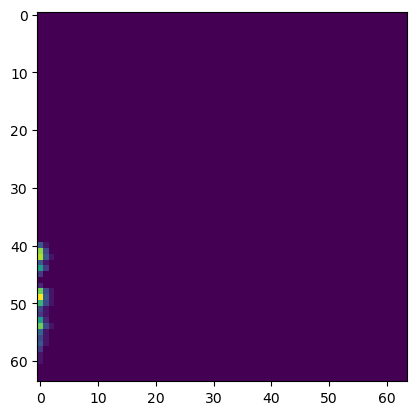

In [36]:
# get single channel from the dataset and plot it using imshow
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(data_set[0][0][0].numpy(), cmap='viridis')